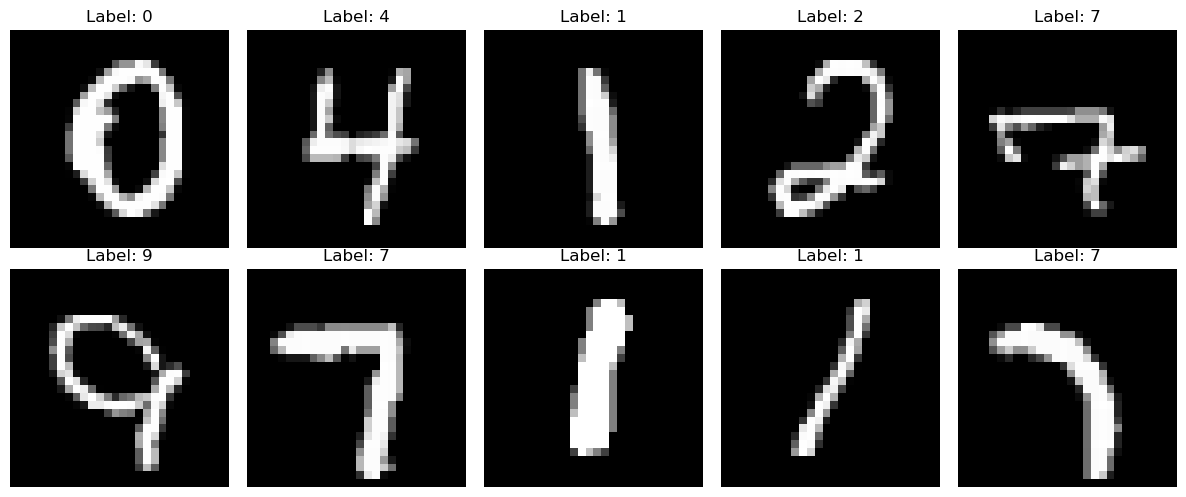

In [49]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

import time

import matplotlib.pyplot as plt
import numpy as np

import sklearn
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state


# Load data from https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False, data_home="./sk_learn_data")

# Display 10 images from X
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X[permutation[i]].reshape(28, 28), cmap='gray')
    ax.set_title(f'Label: {y[permutation[i]]}')
    ax.axis('off')
plt.tight_layout()
plt.show()

Xs=StandardScaler().fit_transform(X)
y=y.astype(np.uint8)

X_train, X_test, y_train, y_test = train_test_split(
    Xs, y, test_size=2000, train_size=8000, random_state=20354103
)

Xn_train, Xn_test, yn_train, y_test = train_test_split(
    X, y, test_size=2000, train_size=8000, random_state=20354103
)


In [50]:
c = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(100,), activation='relu',
    solver='adam',
    batch_size=128,
    max_iter=20,
    random_state=42)


c.fit(X_train, y_train)

s = c.score(X_test, y_test)
print(s)


0.935


/opt/homebrew/Caskroom/miniconda/base/envs/DataMining/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


93 100


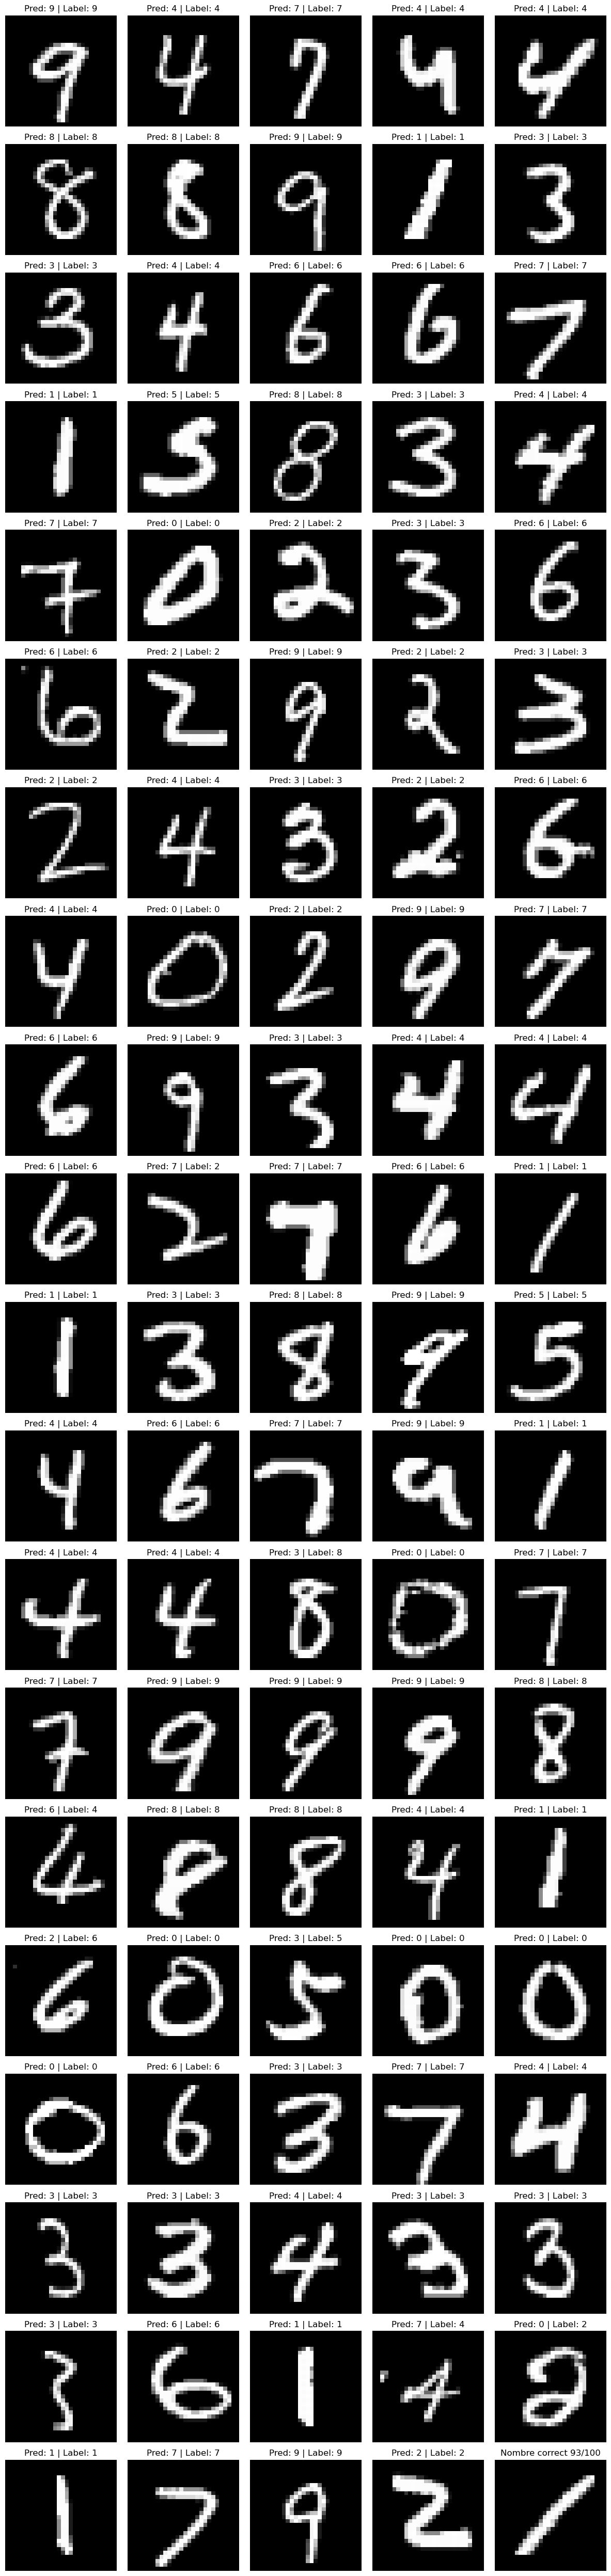

In [ ]:

# Display 10 test images with predictions
col=20
fig, axes = plt.subplots(col, 5, figsize=(12, 2.5*col))

N=axes.shape[0]*axes.shape[1]

r=np.random.randint(0,100000)
Xi = check_random_state(r).permutation(list(range(len(X_test))))
predictions = [c.predict(X_test[A:A+1])[0] for A in Xi[:N]]

g=0
for i in range(N):
    if y_test[Xi[i]] == predictions[i]:
        g+=1


for i, ax in enumerate(axes.flatten()):
    # Reshape and display the image (need to inverse transform from standardized data)
    ax.imshow(Xn_test[Xi[i]].reshape(28, 28), cmap='gray')
    ax.set_title(f'Pred: {predictions[i]} | Label: {y_test[Xi[i]]}')
    ax.axis('off')

print(g,N)
plt.title(f"Corrects {g}/{N}")
plt.tight_layout()
plt.show()